<a href="https://colab.research.google.com/github/hongqin/python-covid19-analysis-sandbox/blob/master/PD_demo_jhu_covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Python to analyze the Covid19 data
Hong Qin

Code at https://github.com/hongqin/python-covid19-analysis-sandbox/blob/master/PD_demo_jhu_covid19.ipynb

Video at https://youtu.be/1JDP4o92tss 

These materials are for education only.


In [1]:
### Import libraries
import pandas as pd # primary data structure library

# Part1. Downloading GitHub Data set 

In [2]:
#! git clone https://github.com/CSSEGISandData/COVID-19.git

Cloning into 'COVID-19'...
remote: Enumerating objects: 200547, done.
remote: Counting objects: 100% (2370/2370), done.
remote: Compressing objects: 100% (1034/1034), done.
remote: Total 200547 (delta 1524), reused 1677 (delta 1336), pack-reused 198177
Receiving objects: 100% (200547/200547), 2.02 GiB | 24.63 MiB/s, done.
Resolving deltas: 100% (154438/154438), done.
Checking out files: 100% (1368/1368), done.


This data is collected from repository for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE).https://github.com/CSSEGISandData/COVID-19

In [94]:

### Select data path
#fullpath1= '/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'

fullpath1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'

df1 = pd.read_csv(fullpath1, error_bad_lines=False)

#fullpath2 = '/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
fullpath2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

df2 = pd.read_csv(fullpath2, error_bad_lines=False)

# Part 2. Explore USA time series by counties

In [99]:
df1.shape

(3342, 621)

In [100]:
df2.shape

(279, 614)

view the dataframe

In [101]:
df1.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,8/14/21,8/15/21,8/16/21,8/17/21,8/18/21,8/19/21,8/20/21,8/21/21,8/22/21,8/23/21,8/24/21,8/25/21,8/26/21,8/27/21,8/28/21,8/29/21,8/30/21,8/31/21,9/1/21,9/2/21,9/3/21,9/4/21,9/5/21,9/6/21,9/7/21,9/8/21,9/9/21,9/10/21,9/11/21,9/12/21,9/13/21,9/14/21,9/15/21,9/16/21,9/17/21,9/18/21,9/19/21,9/20/21,9/21/21,9/22/21
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7931,8025,8061,8091,8132,8162,8199,8286,8311,8332,8332,8332,8486,8550,8637,8657,8719,8758,8798,8873,8909,8959,9012,9048,9063,9108,9145,9207,9246,9287,9317,9351,9371,9416,9439,9493,9511,9527,9546,9568
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,28629,29094,29234,29465,29836,30106,30484,30939,31176,31313,31313,31313,31878,32054,32511,32671,32783,33090,33270,33480,33789,33968,34063,34142,34246,34393,34536,34726,34872,34950,35039,35221,35347,35517,35619,35707,35750,35814,35886,35946
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2732,2750,2761,2785,2805,2821,2833,2851,2872,2878,2878,2878,2929,2948,2988,3020,3036,3060,3086,3100,3142,3166,3184,3197,3207,3225,3243,3260,3282,3295,3315,3329,3346,3355,3370,3389,3398,3403,3416,3419
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3095,3120,3129,3152,3170,3189,3234,3271,3289,3306,3306,3306,3359,3385,3415,3426,3436,3479,3510,3545,3580,3618,3628,3641,3661,3694,3727,3752,3778,3795,3821,3859,3889,3929,3947,3961,3969,3979,3997,4016
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7758,7803,7833,7884,7930,7977,8018,8084,8145,8173,8173,8173,8340,8413,8482,8512,8530,8595,8631,8699,8763,8830,8862,8899,8951,8998,9048,9095,9161,9176,9199,9246,9272,9329,9357,9418,9452,9481,9522,9555


How to find out the columns?

In [102]:
# dir(df1)

In [103]:
df1.columns

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_',
       ...
       '9/13/21', '9/14/21', '9/15/21', '9/16/21', '9/17/21', '9/18/21',
       '9/19/21', '9/20/21', '9/21/21', '9/22/21'],
      dtype='object', length=621)

In [104]:
df1.tail()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,8/14/21,8/15/21,8/16/21,8/17/21,8/18/21,8/19/21,8/20/21,8/21/21,8/22/21,8/23/21,8/24/21,8/25/21,8/26/21,8/27/21,8/28/21,8/29/21,8/30/21,8/31/21,9/1/21,9/2/21,9/3/21,9/4/21,9/5/21,9/6/21,9/7/21,9/8/21,9/9/21,9/10/21,9/11/21,9/12/21,9/13/21,9/14/21,9/15/21,9/16/21,9/17/21,9/18/21,9/19/21,9/20/21,9/21/21,9/22/21
3337,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,"Teton, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4068,4068,4107,4116,4130,4146,4179,4179,4179,4252,4265,4300,4329,4356,4356,4356,4419,4427,4460,4476,4502,4502,4502,4502,4568,4572,4587,4611,4611,4611,4655,4679,4694,4726,4743,4743,4743,4804,4819,4851
3338,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,"Uinta, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2593,2593,2615,2636,2686,2708,2734,2734,2734,2773,2810,2841,2873,2914,2914,2914,2949,2971,3000,3035,3053,3053,3053,3053,3086,3141,3168,3204,3204,3204,3226,3248,3269,3303,3326,3326,3326,3350,3371,3393
3339,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,"Unassigned, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3340,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,"Washakie, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,967,967,971,973,979,983,985,985,985,995,997,1003,1014,1017,1017,1017,1028,1037,1051,1068,1080,1080,1080,1080,1087,1104,1111,1120,1120,1120,1129,1148,1157,1169,1173,1173,1173,1187,1204,1223
3341,84056045,US,USA,840,56045.0,Weston,Wyoming,US,43.839612,-104.567488,"Weston, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,705,705,717,721,726,729,737,737,737,751,757,760,765,773,773,773,775,780,789,799,802,802,802,802,813,821,824,829,829,829,838,845,847,848,854,854,854,862,863,863


In [105]:
df1['Admin2'][3337:3339]

3337    Teton
3338    Uinta
Name: Admin2, dtype: object

In [106]:
df1.iloc[3337:3340, 4:7] #be aware that Python is typically end-exclusive! 

,FIPS,Admin2,Province_State
3337,56039.0,Teton,Wyoming
3338,56041.0,Uinta,Wyoming
3339,90056.0,Unassigned,Wyoming


How to find out dataframe dimensions

In [107]:
print ('dataframe dimensions:', df1.shape)

dataframe dimensions: (3342, 621)


How many "province states" are there in this data set?

In [108]:
df1.Province_State.unique()

array(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'Diamond Princess', 'District of Columbia', 'Florida', 'Georgia',
       'Grand Princess', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Northern Mariana Islands', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virgin Islands', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [109]:
len(df1.Province_State.unique())

58

### Q, what is the larged case value in this data set? 

In [110]:
df1.iloc[:, 11:].max().max()

1448065

Find out the largest value for column '1/14/21'

In [111]:
df1["5/24/21"].max()

1238932

## Find out which row has the largest value. 

In [112]:
df1.loc[df1['5/24/21']==1238932]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,8/14/21,8/15/21,8/16/21,8/17/21,8/18/21,8/19/21,8/20/21,8/21/21,8/22/21,8/23/21,8/24/21,8/25/21,8/26/21,8/27/21,8/28/21,8/29/21,8/30/21,8/31/21,9/1/21,9/2/21,9/3/21,9/4/21,9/5/21,9/6/21,9/7/21,9/8/21,9/9/21,9/10/21,9/11/21,9/12/21,9/13/21,9/14/21,9/15/21,9/16/21,9/17/21,9/18/21,9/19/21,9/20/21,9/21/21,9/22/21
215,84006037,US,USA,840,6037.0,Los Angeles,California,US,34.308284,-118.228241,"Los Angeles, California, US",0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1347023,1350370,1353071,1356249,1359897,1362848,1376551,1380415,1383186,1385784,1388672,1391513,1394632,1397480,1400837,1403053,1405387,1407317,1409684,1412379,1414854,1416919,1419030,1420560,1421616,1423620,1423620,1427817,1427817,1427817,1433465,1435163,1437073,1439011,1440721,1442808,1444127,1445121,1446348,1448065


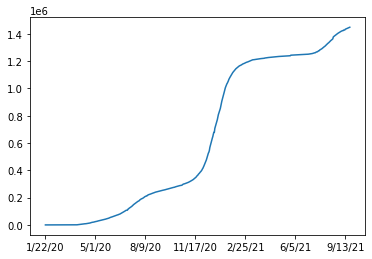

In [113]:
LA = df1.iloc[215, 11:]
type(LA)
#print(LA)
LA.plot()

## plot
Because pandas do plot by columns, JHU data set put time series by row. So, we have to transpose the JHU dataframe. 

In [114]:
UScases = df1.iloc[0:3, 11:].transpose() 
UScases.shape
UScases

,0,1,2
1/22/20,0,0,0
1/23/20,0,0,0
1/24/20,0,0,0
1/25/20,0,0,0
1/26/20,0,0,0
...,...,...,...
9/18/21,9493,35707,3389
9/19/21,9511,35750,3398
9/20/21,9527,35814,3403
9/21/21,9546,35886,3416


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb425342b90>,
      dtype=object)

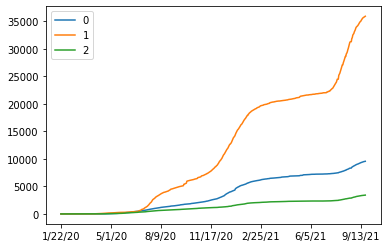

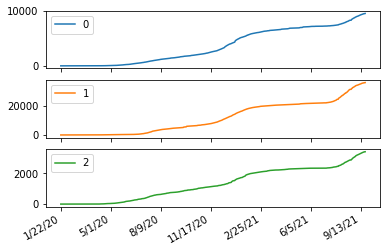

In [115]:
UScases.plot()
UScases.plot(subplots=True)

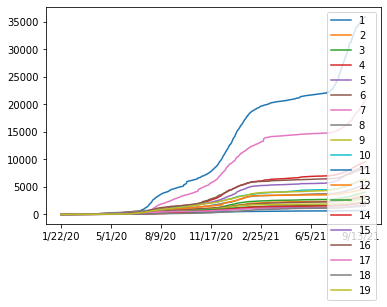

In [20]:
df1.iloc[1:20, 11:].transpose().plot()


## Add meaningful index to the dataframe

In [21]:
# one way is to load csv with index 
df1 = pd.read_csv(fullpath1, error_bad_lines=False, index_col=10) #10th index picks 11th column of "Combined_Key"
df1.reset_index(drop=True)
df1.index

Index(['Autauga, Alabama, US', 'Baldwin, Alabama, US', 'Barbour, Alabama, US',
       'Bibb, Alabama, US', 'Blount, Alabama, US', 'Bullock, Alabama, US',
       'Butler, Alabama, US', 'Calhoun, Alabama, US', 'Chambers, Alabama, US',
       'Cherokee, Alabama, US',
       ...
       'Park, Wyoming, US', 'Platte, Wyoming, US', 'Sheridan, Wyoming, US',
       'Sublette, Wyoming, US', 'Sweetwater, Wyoming, US',
       'Teton, Wyoming, US', 'Uinta, Wyoming, US', 'Unassigned, Wyoming, US',
       'Washakie, Wyoming, US', 'Weston, Wyoming, US'],
      dtype='object', name='Combined_Key', length=3342)

In [22]:
df1.shape

(3342, 620)

In [23]:
df1.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,...,8/14/21,8/15/21,8/16/21,8/17/21,8/18/21,8/19/21,8/20/21,8/21/21,8/22/21,8/23/21,8/24/21,8/25/21,8/26/21,8/27/21,8/28/21,8/29/21,8/30/21,8/31/21,9/1/21,9/2/21,9/3/21,9/4/21,9/5/21,9/6/21,9/7/21,9/8/21,9/9/21,9/10/21,9/11/21,9/12/21,9/13/21,9/14/21,9/15/21,9/16/21,9/17/21,9/18/21,9/19/21,9/20/21,9/21/21,9/22/21
Combined_Key,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Autauga, Alabama, US",84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7931,8025,8061,8091,8132,8162,8199,8286,8311,8332,8332,8332,8486,8550,8637,8657,8719,8758,8798,8873,8909,8959,9012,9048,9063,9108,9145,9207,9246,9287,9317,9351,9371,9416,9439,9493,9511,9527,9546,9568
"Baldwin, Alabama, US",84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,28629,29094,29234,29465,29836,30106,30484,30939,31176,31313,31313,31313,31878,32054,32511,32671,32783,33090,33270,33480,33789,33968,34063,34142,34246,34393,34536,34726,34872,34950,35039,35221,35347,35517,35619,35707,35750,35814,35886,35946
"Barbour, Alabama, US",84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2732,2750,2761,2785,2805,2821,2833,2851,2872,2878,2878,2878,2929,2948,2988,3020,3036,3060,3086,3100,3142,3166,3184,3197,3207,3225,3243,3260,3282,3295,3315,3329,3346,3355,3370,3389,3398,3403,3416,3419
"Bibb, Alabama, US",84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3095,3120,3129,3152,3170,3189,3234,3271,3289,3306,3306,3306,3359,3385,3415,3426,3436,3479,3510,3545,3580,3618,3628,3641,3661,3694,3727,3752,3778,3795,3821,3859,3889,3929,3947,3961,3969,3979,3997,4016
"Blount, Alabama, US",84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7758,7803,7833,7884,7930,7977,8018,8084,8145,8173,8173,8173,8340,8413,8482,8512,8530,8595,8631,8699,8763,8830,8862,8899,8951,8998,9048,9095,9161,9176,9199,9246,9272,9329,9357,9418,9452,9481,9522,9555


In [24]:
# another way is to re-assign index
df1 = pd.read_csv(fullpath1, error_bad_lines=False)
newrows = list( df1['Combined_Key'])
df1.index =  newrows
df1.shape

(3342, 621)

In [25]:
df1.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,8/14/21,8/15/21,8/16/21,8/17/21,8/18/21,8/19/21,8/20/21,8/21/21,8/22/21,8/23/21,8/24/21,8/25/21,8/26/21,8/27/21,8/28/21,8/29/21,8/30/21,8/31/21,9/1/21,9/2/21,9/3/21,9/4/21,9/5/21,9/6/21,9/7/21,9/8/21,9/9/21,9/10/21,9/11/21,9/12/21,9/13/21,9/14/21,9/15/21,9/16/21,9/17/21,9/18/21,9/19/21,9/20/21,9/21/21,9/22/21
"Autauga, Alabama, US",84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7931,8025,8061,8091,8132,8162,8199,8286,8311,8332,8332,8332,8486,8550,8637,8657,8719,8758,8798,8873,8909,8959,9012,9048,9063,9108,9145,9207,9246,9287,9317,9351,9371,9416,9439,9493,9511,9527,9546,9568
"Baldwin, Alabama, US",84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,28629,29094,29234,29465,29836,30106,30484,30939,31176,31313,31313,31313,31878,32054,32511,32671,32783,33090,33270,33480,33789,33968,34063,34142,34246,34393,34536,34726,34872,34950,35039,35221,35347,35517,35619,35707,35750,35814,35886,35946
"Barbour, Alabama, US",84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2732,2750,2761,2785,2805,2821,2833,2851,2872,2878,2878,2878,2929,2948,2988,3020,3036,3060,3086,3100,3142,3166,3184,3197,3207,3225,3243,3260,3282,3295,3315,3329,3346,3355,3370,3389,3398,3403,3416,3419
"Bibb, Alabama, US",84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3095,3120,3129,3152,3170,3189,3234,3271,3289,3306,3306,3306,3359,3385,3415,3426,3436,3479,3510,3545,3580,3618,3628,3641,3661,3694,3727,3752,3778,3795,3821,3859,3889,3929,3947,3961,3969,3979,3997,4016
"Blount, Alabama, US",84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7758,7803,7833,7884,7930,7977,8018,8084,8145,8173,8173,8173,8340,8413,8482,8512,8530,8595,8631,8699,8763,8830,8862,8899,8951,8998,9048,9095,9161,9176,9199,9246,9272,9329,9357,9418,9452,9481,9522,9555


In [26]:
list(df1['Combined_Key'] )[1:10]

['Baldwin, Alabama, US',
 'Barbour, Alabama, US',
 'Bibb, Alabama, US',
 'Blount, Alabama, US',
 'Bullock, Alabama, US',
 'Butler, Alabama, US',
 'Calhoun, Alabama, US',
 'Chambers, Alabama, US',
 'Cherokee, Alabama, US']

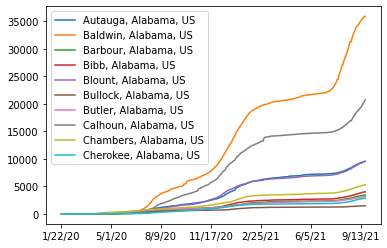

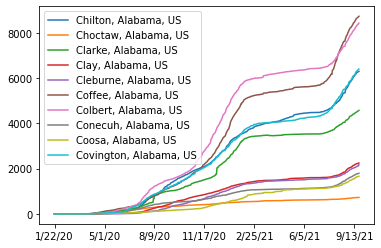

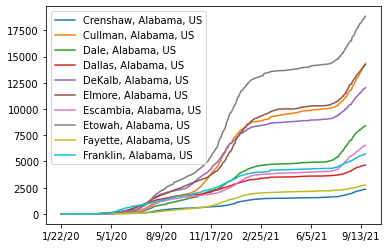

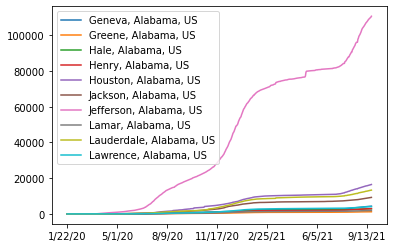

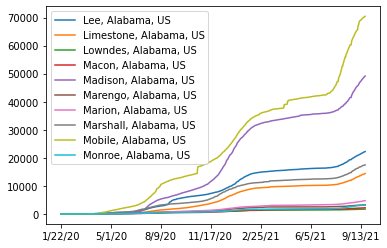

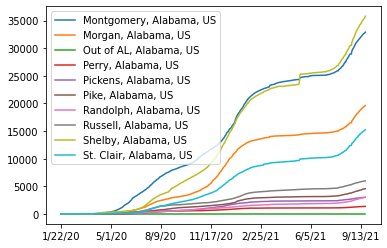

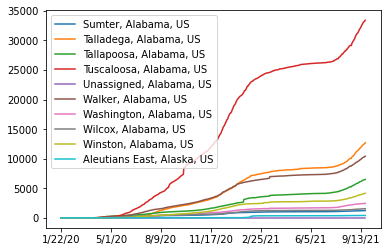

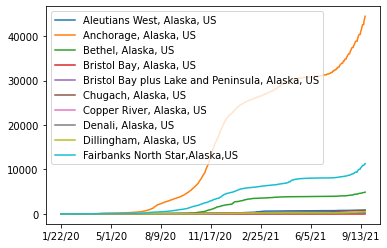

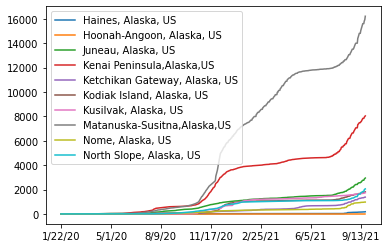

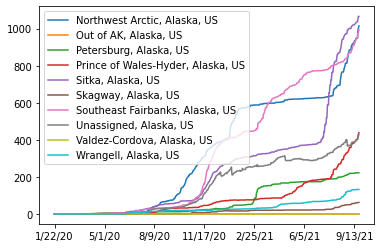

In [27]:
step = 10
for i in range(0, 100, step):
#for i in range(0, 3340, step):
  UScases = df1.iloc[ i : (i+step), 11:].transpose()
  UScases.plot()

In [28]:
df1.tail()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,8/14/21,8/15/21,8/16/21,8/17/21,8/18/21,8/19/21,8/20/21,8/21/21,8/22/21,8/23/21,8/24/21,8/25/21,8/26/21,8/27/21,8/28/21,8/29/21,8/30/21,8/31/21,9/1/21,9/2/21,9/3/21,9/4/21,9/5/21,9/6/21,9/7/21,9/8/21,9/9/21,9/10/21,9/11/21,9/12/21,9/13/21,9/14/21,9/15/21,9/16/21,9/17/21,9/18/21,9/19/21,9/20/21,9/21/21,9/22/21
"Teton, Wyoming, US",84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,"Teton, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4068,4068,4107,4116,4130,4146,4179,4179,4179,4252,4265,4300,4329,4356,4356,4356,4419,4427,4460,4476,4502,4502,4502,4502,4568,4572,4587,4611,4611,4611,4655,4679,4694,4726,4743,4743,4743,4804,4819,4851
"Uinta, Wyoming, US",84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,"Uinta, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2593,2593,2615,2636,2686,2708,2734,2734,2734,2773,2810,2841,2873,2914,2914,2914,2949,2971,3000,3035,3053,3053,3053,3053,3086,3141,3168,3204,3204,3204,3226,3248,3269,3303,3326,3326,3326,3350,3371,3393
"Unassigned, Wyoming, US",84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,"Unassigned, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"Washakie, Wyoming, US",84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,"Washakie, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,967,967,971,973,979,983,985,985,985,995,997,1003,1014,1017,1017,1017,1028,1037,1051,1068,1080,1080,1080,1080,1087,1104,1111,1120,1120,1120,1129,1148,1157,1169,1173,1173,1173,1187,1204,1223
"Weston, Wyoming, US",84056045,US,USA,840,56045.0,Weston,Wyoming,US,43.839612,-104.567488,"Weston, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,705,705,717,721,726,729,737,737,737,751,757,760,765,773,773,773,775,780,789,799,802,802,802,802,813,821,824,829,829,829,838,845,847,848,854,854,854,862,863,863


## Note. It turns out that there are unassigned cases in some states, such as Wyoming. Thse unassigned cases become zero when they are settled. 

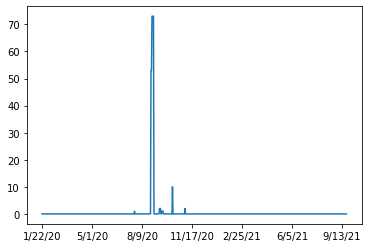

In [29]:
df1.loc['Unassigned, Wyoming, US', ][11:].plot()

In [30]:
df1.loc[ df1.index.str.contains('Unassigned'), ].shape
df1.loc[ df1.index.str.contains('Unassigned'), ].head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,8/14/21,8/15/21,8/16/21,8/17/21,8/18/21,8/19/21,8/20/21,8/21/21,8/22/21,8/23/21,8/24/21,8/25/21,8/26/21,8/27/21,8/28/21,8/29/21,8/30/21,8/31/21,9/1/21,9/2/21,9/3/21,9/4/21,9/5/21,9/6/21,9/7/21,9/8/21,9/9/21,9/10/21,9/11/21,9/12/21,9/13/21,9/14/21,9/15/21,9/16/21,9/17/21,9/18/21,9/19/21,9/20/21,9/21/21,9/22/21
"Unassigned, Alabama, US",84090001,US,USA,840,90001.0,Unassigned,Alabama,US,0.0,0.0,"Unassigned, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"Unassigned, Alaska, US",84090002,US,USA,840,90002.0,Unassigned,Alaska,US,0.0,0.0,"Unassigned, Alaska, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,363,363,363,364,372,373,376,376,376,383,385,386,386,400,400,400,366,368,371,367,370,370,370,370,382,386,387,388,388,388,386,388,394,394,402,402,402,408,421,428
"Unassigned, Arizona, US",84090004,US,USA,840,90004.0,Unassigned,Arizona,US,0.0,0.0,"Unassigned, Arizona, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,1,1,1,1,0,0,1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
"Unassigned, Arkansas, US",84090005,US,USA,840,90005.0,Unassigned,Arkansas,US,0.0,0.0,"Unassigned, Arkansas, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3918,3942,3887,3911,4006,4265,4405,4443,4450,4396,4458,4569,4626,4657,4711,4695,4685,4730,4667,4733,4793,4848,4929,4898,4906,4950,5024,5029,5083,5107,5133,5122,5146,5109,5155,5197,5244,5236,5311,5409
"Unassigned, California, US",84090006,US,USA,840,90006.0,Unassigned,California,US,0.0,0.0,"Unassigned, California, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,107,84,132,181,73,83,111,56,91,145,197,258,242,127,114,212,276,346,223,112,97,102,91,130,173,203,109,66,98,99,151,202,103,90,117,101,118,165,212,114


In [31]:
# df1.loc[df1.index.str.contains('Unassigned'), ].plot() #No, this is not working properly

In [32]:
# df1.loc[df1.index.str.contains("Unsassigned"),11:].plot() #error 

In [33]:
# df1.loc[df1.index.str.contains("Unassigned")][11:].plot() #wrong plot

In [34]:
#df1.loc[df1.index.str.contains('Unassigned'), :][:,11:]

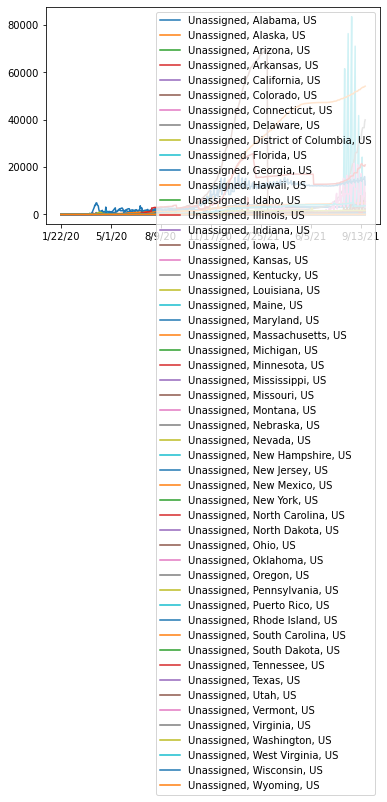

In [35]:
unassigned_df = df1.loc[df1.index.str.contains('Unassigned')]
unassigned_df.iloc[ :, 11:].shape
unassigned_df.iloc[ :, 11:].transpose().plot()

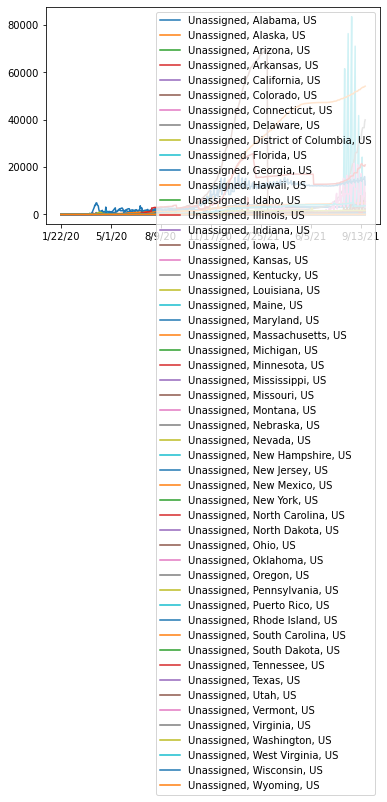

In [36]:
df1.loc[df1.index.str.contains('Unassigned')].iloc[:, 11:].transpose().plot() # Well done, a single line solution! 

## How about the cases at the Hamilton county, TN? 

In [37]:
# Can we examine cumualted cases at the Hamilton County, TN? 


df1.loc[df1['Combined_Key'] == 'Hamilton, Tennessee, US']

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,8/14/21,8/15/21,8/16/21,8/17/21,8/18/21,8/19/21,8/20/21,8/21/21,8/22/21,8/23/21,8/24/21,8/25/21,8/26/21,8/27/21,8/28/21,8/29/21,8/30/21,8/31/21,9/1/21,9/2/21,9/3/21,9/4/21,9/5/21,9/6/21,9/7/21,9/8/21,9/9/21,9/10/21,9/11/21,9/12/21,9/13/21,9/14/21,9/15/21,9/16/21,9/17/21,9/18/21,9/19/21,9/20/21,9/21/21,9/22/21
"Hamilton, Tennessee, US",84047065,US,USA,840,47065.0,Hamilton,Tennessee,US,35.176702,-85.166522,"Hamilton, Tennessee, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,49536,49536,50145,50309,50527,50785,51042,51042,51042,51834,52048,52048,52507,52844,52844,52844,53613,53970,54369,54565,54924,54924,54924,54924,56336,56607,56810,56928,56928,56928,58066,58272,58580,58825,59084,59084,59084,59524,59524,59996


In [38]:
dfHamilton = df1[df1.Combined_Key == "Hamilton, Tennessee, US"]
dfHamilton

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,8/14/21,8/15/21,8/16/21,8/17/21,8/18/21,8/19/21,8/20/21,8/21/21,8/22/21,8/23/21,8/24/21,8/25/21,8/26/21,8/27/21,8/28/21,8/29/21,8/30/21,8/31/21,9/1/21,9/2/21,9/3/21,9/4/21,9/5/21,9/6/21,9/7/21,9/8/21,9/9/21,9/10/21,9/11/21,9/12/21,9/13/21,9/14/21,9/15/21,9/16/21,9/17/21,9/18/21,9/19/21,9/20/21,9/21/21,9/22/21
"Hamilton, Tennessee, US",84047065,US,USA,840,47065.0,Hamilton,Tennessee,US,35.176702,-85.166522,"Hamilton, Tennessee, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,49536,49536,50145,50309,50527,50785,51042,51042,51042,51834,52048,52048,52507,52844,52844,52844,53613,53970,54369,54565,54924,54924,54924,54924,56336,56607,56810,56928,56928,56928,58066,58272,58580,58825,59084,59084,59084,59524,59524,59996


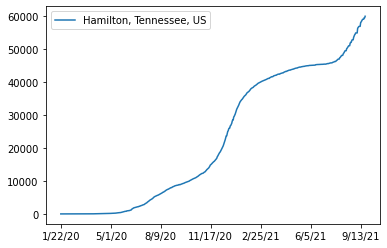

In [39]:
df1.loc[df1['Combined_Key'] == 'Hamilton, Tennessee, US'].iloc[:, 11:].transpose().plot()

#Part 3. Examine the cases in each state.

In [40]:

df1.loc[ :, 'Province_State']

Autauga, Alabama, US       Alabama
Baldwin, Alabama, US       Alabama
Barbour, Alabama, US       Alabama
Bibb, Alabama, US          Alabama
Blount, Alabama, US        Alabama
                            ...   
Teton, Wyoming, US         Wyoming
Uinta, Wyoming, US         Wyoming
Unassigned, Wyoming, US    Wyoming
Washakie, Wyoming, US      Wyoming
Weston, Wyoming, US        Wyoming
Name: Province_State, Length: 3342, dtype: object

In [41]:
groupby_state = df1.iloc[:,11:].groupby(df1['Province_State'])
type( groupby_state )

pandas.core.groupby.generic.DataFrameGroupBy

In [42]:
df_by_state = groupby_state.sum()
type( df_by_state )

pandas.core.frame.DataFrame

In [43]:
df_by_state.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,8/14/21,8/15/21,8/16/21,8/17/21,8/18/21,8/19/21,8/20/21,8/21/21,8/22/21,8/23/21,8/24/21,8/25/21,8/26/21,8/27/21,8/28/21,8/29/21,8/30/21,8/31/21,9/1/21,9/2/21,9/3/21,9/4/21,9/5/21,9/6/21,9/7/21,9/8/21,9/9/21,9/10/21,9/11/21,9/12/21,9/13/21,9/14/21,9/15/21,9/16/21,9/17/21,9/18/21,9/19/21,9/20/21,9/21/21,9/22/21
Province_State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,627905,634897,637363,641386,645851,649741,653540,659750,663065,665653,665653,665653,676795,681828,688018,691451,694523,699729,704420,709732,714860,719280,722122,724688,727360,732151,736518,741318,745812,747606,750298,754242,757893,761865,764839,768301,770391,772311,775531,778549
Alaska,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,79823,79823,80885,81337,82002,82687,83156,83156,83156,84272,84867,85491,86218,86753,86753,86753,87908,88547,89345,90060,90642,90642,90642,90642,92790,93632,94474,95175,95175,95175,96635,97326,98419,99472,100360,100360,100360,102471,103327,104574
American Samoa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Arizona,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,962410,965462,967862,970523,972925,976471,979580,982775,986082,988714,991309,991309,998164,1001871,1005764,1007854,1011101,1011923,1016663,1020133,1023935,1027359,1030430,1032808,1034790,1037012,1039492,1042480,1045835,1048600,1050878,1053487,1055919,1058774,1061604,1064346,1066803,1068823,1070757,1072863
Arkansas,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,418290,419807,420663,422866,425551,429100,431507,434027,435256,436242,438465,441246,443564,446430,448596,449383,450265,452891,455781,458234,460363,462723,463795,464732,465315,467496,469977,472136,473885,475001,475647,477191,479110,480934,482743,484317,485056,485452,486853,488316


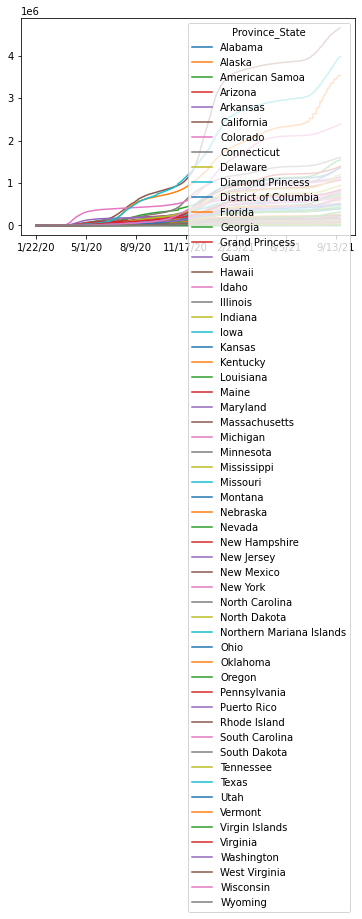

In [44]:
df_by_state.transpose().plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb426299ad0>,
      dtype=object)

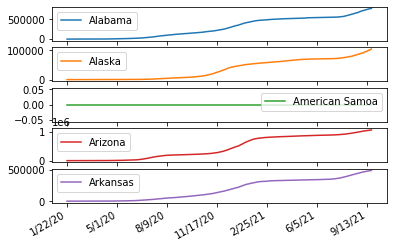

In [45]:
df_by_state.transpose().iloc[:,0:5].plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb428542290>],
      dtype=object)

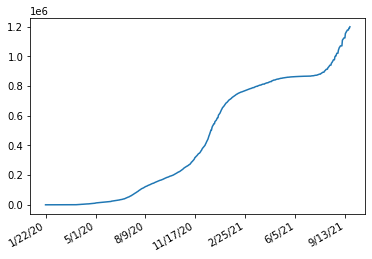

In [46]:
df_by_state.transpose().loc[:,"Tennessee"].plot(subplots=True)

In [47]:
df_by_state.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,8/14/21,8/15/21,8/16/21,8/17/21,8/18/21,8/19/21,8/20/21,8/21/21,8/22/21,8/23/21,8/24/21,8/25/21,8/26/21,8/27/21,8/28/21,8/29/21,8/30/21,8/31/21,9/1/21,9/2/21,9/3/21,9/4/21,9/5/21,9/6/21,9/7/21,9/8/21,9/9/21,9/10/21,9/11/21,9/12/21,9/13/21,9/14/21,9/15/21,9/16/21,9/17/21,9/18/21,9/19/21,9/20/21,9/21/21,9/22/21
Province_State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,627905,634897,637363,641386,645851,649741,653540,659750,663065,665653,665653,665653,676795,681828,688018,691451,694523,699729,704420,709732,714860,719280,722122,724688,727360,732151,736518,741318,745812,747606,750298,754242,757893,761865,764839,768301,770391,772311,775531,778549
Alaska,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,79823,79823,80885,81337,82002,82687,83156,83156,83156,84272,84867,85491,86218,86753,86753,86753,87908,88547,89345,90060,90642,90642,90642,90642,92790,93632,94474,95175,95175,95175,96635,97326,98419,99472,100360,100360,100360,102471,103327,104574
American Samoa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Arizona,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,962410,965462,967862,970523,972925,976471,979580,982775,986082,988714,991309,991309,998164,1001871,1005764,1007854,1011101,1011923,1016663,1020133,1023935,1027359,1030430,1032808,1034790,1037012,1039492,1042480,1045835,1048600,1050878,1053487,1055919,1058774,1061604,1064346,1066803,1068823,1070757,1072863
Arkansas,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,418290,419807,420663,422866,425551,429100,431507,434027,435256,436242,438465,441246,443564,446430,448596,449383,450265,452891,455781,458234,460363,462723,463795,464732,465315,467496,469977,472136,473885,475001,475647,477191,479110,480934,482743,484317,485056,485452,486853,488316


In [48]:
# df_by_state.loc['Tennessee'][11:].transpose().plot() #This is bit problematic on the columns

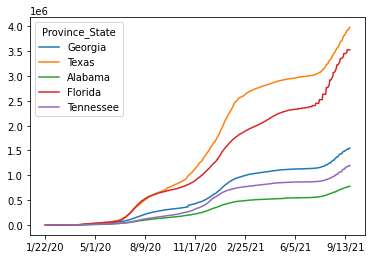

In [49]:
df_by_state.loc[['Georgia', 'Texas', 'Alabama', 'Florida', 'Tennessee']].transpose().plot() #Here, Texas and Tennessee are row-index

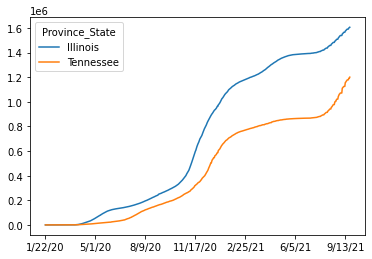

In [50]:
df_by_state.transpose()[['Illinois', 'Tennessee']].plot() #Here, Texas ans Tennessee are columns

# How to examine the new cases daily? 

## diff() on a test dataframe

In [51]:
dataset = [(2, 4, 6, 8),
           (10, 12, 14, 18),
           (20, 22, 24, 26),
           (28, 30, 32, 34)];

df_test = pd.DataFrame(dataset, columns = ("A", "B", "C", "D" ));


In [52]:
df_test.diff(axis=0) #by row

,A,B,C,D
0,NaN,NaN,NaN,NaN
1,8.0,8.0,8.0,10.0
2,10.0,10.0,10.0,8.0
3,8.0,8.0,8.0,8.0


In [53]:
df_test.diff(axis=1) #by column

,A,B,C,D
0,NaN,2.0,2.0,2.0
1,NaN,2.0,2.0,4.0
2,NaN,2.0,2.0,2.0
3,NaN,2.0,2.0,2.0


## diff() on US covid19 data set
 JHU cases are by row, and we need to calculate difference between columns

In [54]:
df_by_state.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,8/14/21,8/15/21,8/16/21,8/17/21,8/18/21,8/19/21,8/20/21,8/21/21,8/22/21,8/23/21,8/24/21,8/25/21,8/26/21,8/27/21,8/28/21,8/29/21,8/30/21,8/31/21,9/1/21,9/2/21,9/3/21,9/4/21,9/5/21,9/6/21,9/7/21,9/8/21,9/9/21,9/10/21,9/11/21,9/12/21,9/13/21,9/14/21,9/15/21,9/16/21,9/17/21,9/18/21,9/19/21,9/20/21,9/21/21,9/22/21
Province_State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,627905,634897,637363,641386,645851,649741,653540,659750,663065,665653,665653,665653,676795,681828,688018,691451,694523,699729,704420,709732,714860,719280,722122,724688,727360,732151,736518,741318,745812,747606,750298,754242,757893,761865,764839,768301,770391,772311,775531,778549
Alaska,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,79823,79823,80885,81337,82002,82687,83156,83156,83156,84272,84867,85491,86218,86753,86753,86753,87908,88547,89345,90060,90642,90642,90642,90642,92790,93632,94474,95175,95175,95175,96635,97326,98419,99472,100360,100360,100360,102471,103327,104574
American Samoa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Arizona,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,962410,965462,967862,970523,972925,976471,979580,982775,986082,988714,991309,991309,998164,1001871,1005764,1007854,1011101,1011923,1016663,1020133,1023935,1027359,1030430,1032808,1034790,1037012,1039492,1042480,1045835,1048600,1050878,1053487,1055919,1058774,1061604,1064346,1066803,1068823,1070757,1072863
Arkansas,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,418290,419807,420663,422866,425551,429100,431507,434027,435256,436242,438465,441246,443564,446430,448596,449383,450265,452891,455781,458234,460363,462723,463795,464732,465315,467496,469977,472136,473885,475001,475647,477191,479110,480934,482743,484317,485056,485452,486853,488316


In [55]:
df_dailycases_by_state =  df_by_state.diff(axis=1) #1 by columns
df_dailycases_by_state.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,8/14/21,8/15/21,8/16/21,8/17/21,8/18/21,8/19/21,8/20/21,8/21/21,8/22/21,8/23/21,8/24/21,8/25/21,8/26/21,8/27/21,8/28/21,8/29/21,8/30/21,8/31/21,9/1/21,9/2/21,9/3/21,9/4/21,9/5/21,9/6/21,9/7/21,9/8/21,9/9/21,9/10/21,9/11/21,9/12/21,9/13/21,9/14/21,9/15/21,9/16/21,9/17/21,9/18/21,9/19/21,9/20/21,9/21/21,9/22/21
Province_State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alabama,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,6992.0,2466.0,4023.0,4465.0,3890.0,3799.0,6210.0,3315.0,2588.0,0.0,0.0,11142.0,5033.0,6190.0,3433.0,3072.0,5206.0,4691.0,5312.0,5128.0,4420.0,2842.0,2566.0,2672.0,4791.0,4367.0,4800.0,4494.0,1794.0,2692.0,3944.0,3651.0,3972.0,2974.0,3462.0,2090.0,1920.0,3220.0,3018.0
Alaska,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1062.0,452.0,665.0,685.0,469.0,0.0,0.0,1116.0,595.0,624.0,727.0,535.0,0.0,0.0,1155.0,639.0,798.0,715.0,582.0,0.0,0.0,0.0,2148.0,842.0,842.0,701.0,0.0,0.0,1460.0,691.0,1093.0,1053.0,888.0,0.0,0.0,2111.0,856.0,1247.0
American Samoa,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Arizona,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3418.0,3052.0,2400.0,2661.0,2402.0,3546.0,3109.0,3195.0,3307.0,2632.0,2595.0,0.0,6855.0,3707.0,3893.0,2090.0,3247.0,822.0,4740.0,3470.0,3802.0,3424.0,3071.0,2378.0,1982.0,2222.0,2480.0,2988.0,3355.0,2765.0,2278.0,2609.0,2432.0,2855.0,2830.0,2742.0,2457.0,2020.0,1934.0,2106.0
Arkansas,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2117.0,1517.0,856.0,2203.0,2685.0,3549.0,2407.0,2520.0,1229.0,986.0,2223.0,2781.0,2318.0,2866.0,2166.0,787.0,882.0,2626.0,2890.0,2453.0,2129.0,2360.0,1072.0,937.0,583.0,2181.0,2481.0,2159.0,1749.0,1116.0,646.0,1544.0,1919.0,1824.0,1809.0,1574.0,739.0,396.0,1401.0,1463.0


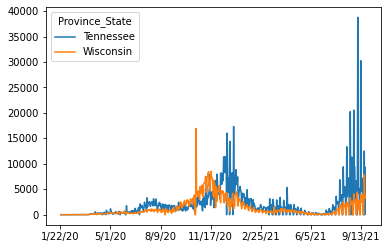

In [56]:
df_dailycases_by_state.transpose()[['Tennessee', 'Wisconsin']].plot()

In [57]:
df_dailycases_by_state.loc[['Tennessee', 'Texas']].iloc[:, 2:].rolling(window=3).mean()

#.rolling(window=3).mean()

,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,...,8/14/21,8/15/21,8/16/21,8/17/21,8/18/21,8/19/21,8/20/21,8/21/21,8/22/21,8/23/21,8/24/21,8/25/21,8/26/21,8/27/21,8/28/21,8/29/21,8/30/21,8/31/21,9/1/21,9/2/21,9/3/21,9/4/21,9/5/21,9/6/21,9/7/21,9/8/21,9/9/21,9/10/21,9/11/21,9/12/21,9/13/21,9/14/21,9/15/21,9/16/21,9/17/21,9/18/21,9/19/21,9/20/21,9/21/21,9/22/21
Province_State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Tennessee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Texas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
df_dailycases_by_state.transpose()[['Tennessee', 'Alaska']].rolling(window=3, center=False).mean()

Province_State,Tennessee,Alaska
1/22/20,NaN,NaN
1/23/20,NaN,NaN
1/24/20,NaN,NaN
1/25/20,0.000000,0.000000
1/26/20,0.000000,0.000000
...,...,...
9/18/21,3626.000000,647.000000
9/19/21,2148.666667,296.000000
9/20/21,4173.666667,703.666667
9/21/21,4173.666667,989.000000


In [59]:
df_dailycases_by_state.transpose()[['Tennessee', 'Alaska']].head()

Province_State,Tennessee,Alaska
1/22/20,NaN,NaN
1/23/20,0.0,0.0
1/24/20,0.0,0.0
1/25/20,0.0,0.0
1/26/20,0.0,0.0


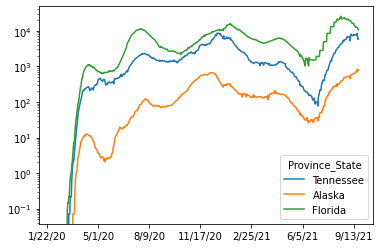

In [60]:
df_dailycases_by_state.transpose()[['Tennessee', 'Alaska', 'Florida']].rolling(window=14).mean().plot(logy=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb428af2e50>,
      dtype=object)

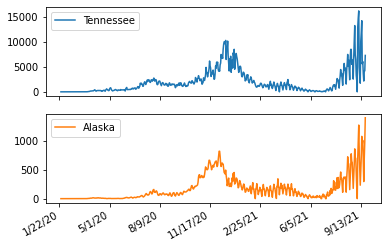

In [61]:
df_dailycases_by_state.transpose()[['Tennessee', 'Alaska']].rolling(window=3).mean().plot(subplots=True)

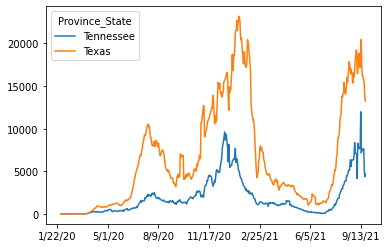

In [62]:
df_dailycases_by_state.transpose()[['Tennessee', 'Texas']].rolling(window=7).mean().plot()

In [63]:
df_dailycases_by_state.transpose()[['Tennessee', 'Texas']].head()

Province_State,Tennessee,Texas
1/22/20,NaN,NaN
1/23/20,0.0,0.0
1/24/20,0.0,0.0
1/25/20,0.0,0.0
1/26/20,0.0,0.0


## Examine the daily confirmed cases in Hamilton County, TN

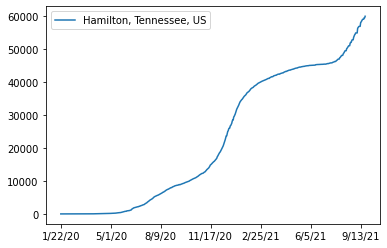

In [64]:
df1.loc[df1['Combined_Key'] == 'Hamilton, Tennessee, US'].iloc[:, 11:].transpose().plot()

In [65]:
df_Hamilton = df1.loc[df1['Combined_Key'] == 'Hamilton, Tennessee, US'].iloc[:, 11:]

type(df_Hamilton)
df_Hamilton.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,8/14/21,8/15/21,8/16/21,8/17/21,8/18/21,8/19/21,8/20/21,8/21/21,8/22/21,8/23/21,8/24/21,8/25/21,8/26/21,8/27/21,8/28/21,8/29/21,8/30/21,8/31/21,9/1/21,9/2/21,9/3/21,9/4/21,9/5/21,9/6/21,9/7/21,9/8/21,9/9/21,9/10/21,9/11/21,9/12/21,9/13/21,9/14/21,9/15/21,9/16/21,9/17/21,9/18/21,9/19/21,9/20/21,9/21/21,9/22/21
"Hamilton, Tennessee, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,49536,49536,50145,50309,50527,50785,51042,51042,51042,51834,52048,52048,52507,52844,52844,52844,53613,53970,54369,54565,54924,54924,54924,54924,56336,56607,56810,56928,56928,56928,58066,58272,58580,58825,59084,59084,59084,59524,59524,59996


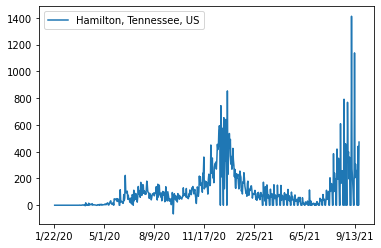

In [66]:
df_Hamilton.transpose().diff(axis=0).plot()

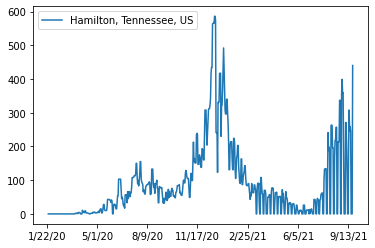

In [67]:
df_Hamilton.transpose().diff(axis=0).rolling(window=3).median().plot()

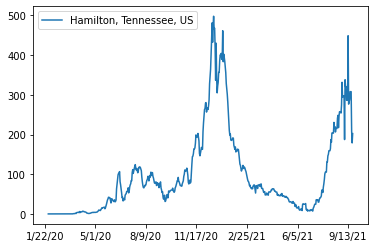

In [68]:
df_Hamilton.transpose().diff(axis=0).rolling(window=7).mean().plot()

# Pick a time window using datetime

In [69]:
#from datetime import datetime 

df_dailycases_by_state2 = df_dailycases_by_state.transpose()

df_dailycases_by_state2.head()

Province_State,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Diamond Princess,District of Columbia,Florida,Georgia,Grand Princess,Guam,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Northern Mariana Islands,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1/22/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/26/20,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
df_dailycases_by_state2.index = pd.to_datetime(df_dailycases_by_state2.index)
df_dailycases_by_state2.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2021-09-13', '2021-09-14', '2021-09-15', '2021-09-16',
               '2021-09-17', '2021-09-18', '2021-09-19', '2021-09-20',
               '2021-09-21', '2021-09-22'],
              dtype='datetime64[ns]', length=610, freq=None)

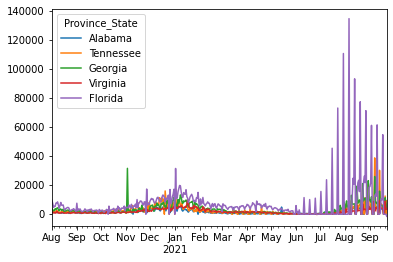

In [71]:
df_dailycases_by_state2.loc['2020-08-01':, ['Alabama', 'Tennessee', 'Georgia', 'Virginia', 'Florida']].plot()


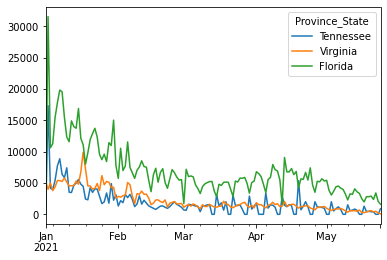

In [72]:

df_dailycases_by_state2.loc['2021-01-01':'2021-05-24', ['Tennessee',  'Virginia', 'Florida']].plot()

## Examine the row with the largest value on 9/8/2020

In [73]:
subset = df1.loc[df1['9/8/20']==249241]

In [74]:
subset = subset.transpose()
subset = subset.iloc[:][11:]
type(subset)

pandas.core.frame.DataFrame

In [75]:
type(subset)

pandas.core.frame.DataFrame

In [76]:
from datetime import datetime

#datetime.strptime( '9/8/20', '%m/%d/%y') 

dates = [datetime.strptime( x, '%m/%d/%y') for x in subset.columns[11:]]
print(dates)

[]


In [77]:
df1.iloc[5:10, -20:-1 ]

,9/3/21,9/4/21,9/5/21,9/6/21,9/7/21,9/8/21,9/9/21,9/10/21,9/11/21,9/12/21,9/13/21,9/14/21,9/15/21,9/16/21,9/17/21,9/18/21,9/19/21,9/20/21,9/21/21
"Bullock, Alabama, US",1399,1404,1409,1412,1422,1430,1434,1435,1440,1441,1442,1451,1456,1462,1468,1471,1472,1473,1475
"Butler, Alabama, US",2866,2887,2902,2912,2925,2938,2952,2979,3003,3012,3024,3037,3058,3076,3084,3097,3106,3119,3138
"Calhoun, Alabama, US",18310,18465,18543,18608,18676,18787,18910,19049,19236,19273,19359,19473,19621,19823,19941,20140,20269,20380,20614
"Chambers, Alabama, US",4840,4871,4888,4905,4930,4960,4994,5019,5052,5062,5084,5125,5155,5182,5211,5240,5256,5281,5305
"Cherokee, Alabama, US",2529,2558,2585,2611,2620,2639,2662,2673,2688,2703,2714,2738,2756,2772,2782,2798,2812,2820,2829


#Part 4 Explore Global Data set

In [78]:

df2 = pd.read_csv(fullpath2, error_bad_lines=False)
df2.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '9/13/21', '9/14/21', '9/15/21', '9/16/21', '9/17/21', '9/18/21',
       '9/19/21', '9/20/21', '9/21/21', '9/22/21'],
      dtype='object', length=614)

In [79]:
df2['Country/Region']
list(df2['Country/Region'].unique())

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',

In [80]:
# Countries affected
countries = df2['Country/Region'].unique().tolist()
print("\nTotal countries affected by virus: ",len(countries))
print(countries)


Total countries affected by virus:  195
['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See', 'Honduras'

In [81]:
df2by_country = df2.iloc[:, 5:].groupby(df2['Country/Region']).sum().transpose()

In [82]:
df2by_country.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Summer Olympics 2020,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,...,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,...,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,6,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,...,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,8,0,0,0,0,0,5,0,0,0,0,0,0,0,0,2,0,0,0,0
1/27/20,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2877,0,0,0,...,0,0,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,0,0,8,0,0,0,0,0,5,0,0,0,0,0,0,0,0,2,0,0,0,0


In [83]:
df2by_country.index = pd.to_datetime(df2by_country.index)

In [84]:
### Check if the dataframe contains NaN values
df2by_country.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Summer Olympics 2020,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,...,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,...,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,6,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,...,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,8,0,0,0,0,0,5,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-27,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2877,0,0,0,...,0,0,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,0,0,8,0,0,0,0,0,5,0,0,0,0,0,0,0,0,2,0,0,0,0


In [85]:
  df2by_country.columns[ df2by_country.columns.str.contains('US') ]

Index(['US'], dtype='object', name='Country/Region')

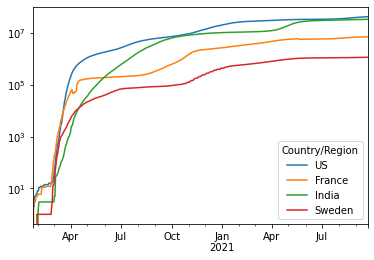

In [86]:
  df2by_country[['US', 'France', 'India', 'Sweden']].plot(logy=True)


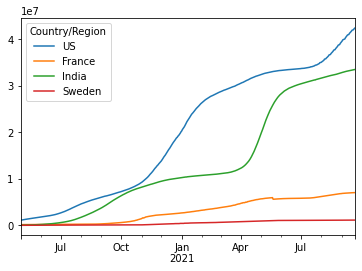

In [87]:
  df2by_country[['US', 'France', 'India', 'Sweden']]['2020-05-01':].plot(logy=False)

# Alternative approach to load data from GitHub

Go to GitHub, select the csv file,  select "view as raw",  and copy the URL. 

In [88]:
import pandas as pd

url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"

df = pd.read_csv(url)

In [89]:
df.head

<bound method NDFrame.head of            UID iso2 iso3  code3  ...  9/19/21 9/20/21 9/21/21 9/22/21
0     84001001   US  USA    840  ...     9511    9527    9546    9568
1     84001003   US  USA    840  ...    35750   35814   35886   35946
2     84001005   US  USA    840  ...     3398    3403    3416    3419
3     84001007   US  USA    840  ...     3969    3979    3997    4016
4     84001009   US  USA    840  ...     9452    9481    9522    9555
...        ...  ...  ...    ...  ...      ...     ...     ...     ...
3337  84056039   US  USA    840  ...     4743    4804    4819    4851
3338  84056041   US  USA    840  ...     3326    3350    3371    3393
3339  84090056   US  USA    840  ...        0       0       0       0
3340  84056043   US  USA    840  ...     1173    1187    1204    1223
3341  84056045   US  USA    840  ...      854     862     863     863

[3342 rows x 621 columns]>

In [90]:
? pd.read_csv()

In [91]:
df2 = pd.read_csv(url, skiprows=5)
df2.head

<bound method NDFrame.head of       84001009  US  USA  840   1009.0  ...   9418   9452   9481   9522   9555
0     84001011  US  USA  840   1011.0  ...   1471   1472   1473   1475   1477
1     84001013  US  USA  840   1013.0  ...   3097   3106   3119   3138   3149
2     84001015  US  USA  840   1015.0  ...  20140  20269  20380  20614  20791
3     84001017  US  USA  840   1017.0  ...   5240   5256   5281   5305   5315
4     84001019  US  USA  840   1019.0  ...   2798   2812   2820   2829   2846
...        ...  ..  ...  ...      ...  ...    ...    ...    ...    ...    ...
3332  84056039  US  USA  840  56039.0  ...   4743   4743   4804   4819   4851
3333  84056041  US  USA  840  56041.0  ...   3326   3326   3350   3371   3393
3334  84090056  US  USA  840  90056.0  ...      0      0      0      0      0
3335  84056043  US  USA  840  56043.0  ...   1173   1173   1187   1204   1223
3336  84056045  US  USA  840  56045.0  ...    854    854    862    863    863

[3337 rows x 621 columns]>

#Part 5. In progress Load Google Mobility data set

In [92]:
#? not working, this site is down. 
#urlGoogleMobility = "https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv"
#df.GM = pd.read_csv(urlGoogleMobility )

In [93]:
df.GM.head

AttributeError: ignored